## 0. import some important package

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. load the data 

Use the data from "[_Microsoft Anonymous Web Data_](http://kdd.ics.uci.edu/databases/msweb/msweb.html)".  
Notice: from the describtion }(http://kdd.ics.uci.edu/databases/msweb/msweb.html), the data in file mainly have 2 parts, "attribute" and "user".


### 1.1 Attribute data

In [9]:
attribute_df = pd.read_csv("anonymous-msweb.data",header=None,skiprows=range(0,7),nrows=293, names=['marks', 'attribute ID','ignored','title','url'])
attribute_df.describe()

,attribute ID,ignored
count,293.000000,293.0
mean,1147.197952,1.0
std,85.435999,0.0
min,1000.000000,1.0
25%,1074.000000,1.0
50%,1147.000000,1.0
75%,1221.000000,1.0
max,1297.000000,1.0


### 1.2 User data

In [4]:
user_df = pd.read_csv("anonymous-msweb.data",header=None,skiprows=range(0,301), names=['marks', 'ID','ignored'])
user_df.head(5)

,marks,ID,ignored
0,C,10001,10001
1,V,1000,1
2,V,1001,1
3,V,1002,1
4,C,10002,10002


## 2. Preprocess the data
The original data did not meet our requirements very well, so some preprocessing was performed to facilitate subsequent data mining
### 2.1 Process attribute data
From the _describtion_, "marks" and "ignored" are useless to our data, "url" seems not helpful for our mining task.

In [5]:

url_save = attribute_df['url']
attribute_df.drop(['marks','ignored','url'],axis=1,inplace=True)

After the procrss applyed, the data become:

In [6]:
attribute_df.sample(5)

,attribute ID,title
186,1114,Service Advantage
168,1159,Transaction Server
279,1221,Microsoft TV Program Information
147,1023,Spain
91,1014,Office Free Stuff


### 2.2 Process user data
Mark "C" means a new case (user), "V" means a vote.  
We want to know the meeting sequence for each user, so change the data structure as {_user:visit sequence_}

In [7]:
user = []
record = []
temp_sequence = None
for index, row in user_df.iterrows():
    if row['marks']=='C':
        if temp_sequence!= None:
            record.append(temp_sequence)
        user.append(row['ID'])
        temp_sequence=[]
    else:
        temp_sequence.append(row['ID'])
record.append(temp_sequence)
user_df = pd.DataFrame({"user":user,"visit":record})


After changing the structure, the user data is follwing:

In [8]:
user_df.sample(5)

,user,visit
23171,33172,[1034]
616,10617,[1004]
18166,28167,"[1056, 1075]"
12353,22354,[1044]
15144,25145,"[1008, 1009, 1034]"


## 3. Explore on data
### 3.1 all attribute visited time

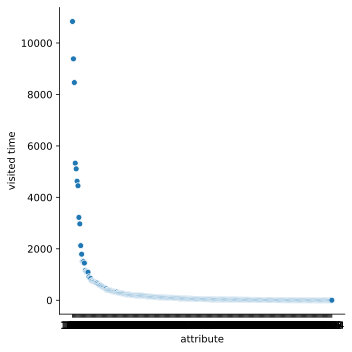

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
record_dict = {}
for index, row in user_df.iterrows():
    sequence=row['visit']
    for i in sequence:
        if i in record_dict.keys():
            record_dict[i]+=1
        else:
            record_dict[i]=1
attr_list = [i for i in record_dict.keys()]
hit_list = [record_dict[i] for i in attr_list]
hit_df = pd.DataFrame({"attribute":attr_list,"visited time":hit_list})
hit_df.sort_values("visited time",inplace=True,ascending=[False])
hit_df['attribute']= hit_df['attribute'].map(lambda x:str(x))
sns.relplot(x="attribute",y="visited time",data=hit_df)

In [22]:
hit_df.describe()

,visited time
count,285.000000
mean,346.154386
std,1171.189066
min,1.000000
25%,10.000000
50%,46.000000
75%,187.000000
max,10836.000000
